In [1]:
# 导入相关模块
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
# 画图
import seaborn as sns
import pandas as pd
# 导入模型
# 线性回归
from sklearn.linear_model import LinearRegression
# 划分数据集
import sklearn.model_selection as skmodel
# 选择线性模型
import sklearn.linear_model as sklinear
# 特征处理，标准化
import sklearn.preprocessing as skprep
# 性能度量
import sklearn.metrics as skmetrics

In [2]:
# 获取数据
# data.data为特征，data.targe为目标
data = skdata.load_boston()

# 转化为dataframe
df = pd.DataFrame(data['data'], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
df = df[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
df

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [3]:
df['PRICE'] = data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   TAX      506 non-null    float64
 7   PTRATIO  506 non-null    float64
 8   B        506 non-null    float64
 9   LSTAT    506 non-null    float64
 10  PRICE    506 non-null    float64
dtypes: float64(11)
memory usage: 43.6 KB


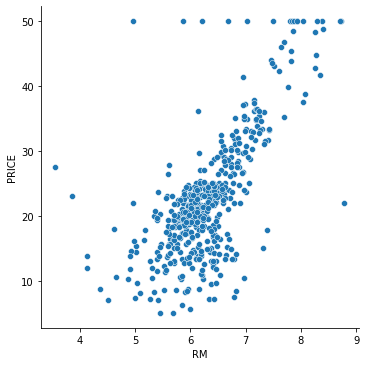

In [4]:
# 绘制散点图，初步探索数据间关系
sns.relplot(x='RM', y='PRICE', data=df)

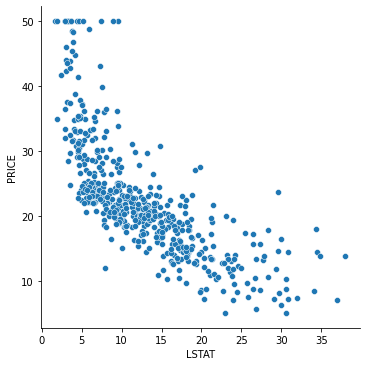

In [5]:
sns.relplot(x='LSTAT', y='PRICE', data=df)

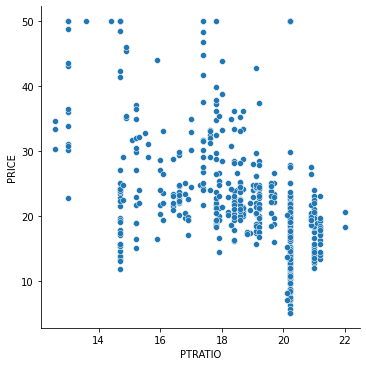

In [6]:
sns.relplot(x='PTRATIO', y='PRICE', data=df)

In [7]:
# df.drop(columns = 'PRICE')
# df

In [8]:
x_train, x_test, y_train, y_test = skmodel.train_test_split(df.drop(columns = 'PRICE'), df['PRICE'], random_state=22)

In [9]:
# 数据集划分
# x_train, x_test, y_train, y_test = skmodel.train_test_split(data.data, data.target, random_state=22)

In [10]:
# 特征工程,划分到同一区间(-1~1)
transfer = skprep.StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

In [11]:
# 4.机器学习-线性回归(特征方程)
# 梯度下降
# estimator = sklinear.SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
estimator = sklinear.SGDRegressor(max_iter=100)

In [12]:
# 特征方程
# estimator = LinearRegression()

In [13]:
estimator.fit(x_train, y_train)

SGDRegressor(max_iter=100)

In [14]:
# 5.模型评估
# 5.1 获取系数等值
y_predict = estimator.predict(x_test)
print("预测值为:\n", y_predict)
print("模型中的系数为:\n", estimator.coef_)
print("模型中的偏置为:\n", estimator.intercept_)

预测值为:
 [28.91237404 32.16328794 21.70083154 29.03055357 19.93368888 17.93171734
 21.57674848 18.45066114 19.21406721 33.99672531 21.81927056 26.76831273
 15.46525569 20.23524892 38.62631879 18.46493562  8.7892084  18.18527712
 31.50365403 24.66408229 17.68126656 33.69861892 25.64590497 16.53246528
 35.06779486 26.57807942 32.47866341 26.64230522 18.21493422 16.07379359
 30.14369058 12.12523563 36.6982259  10.56578659 15.67576489 14.99736563
  7.11753349 18.55395484 36.86925686 29.68783318 25.27777168 16.59198666
 36.09482972  4.50281953 20.60100444 24.48108074 17.56774708 21.04873469
 12.10566677 26.3922312  11.09784632 26.51705904 26.87010877 16.03585045
  7.75138307 35.26256964 28.74589761 24.45865    16.89967454 20.24006601
 24.19872597 23.61874759 20.34278949 37.90237563 27.54235232 18.27580723
 12.56666377  5.17893792 40.84806026 21.90415048 15.57507305 22.12187223
 41.21488094 21.84788542 36.84669394 27.620179   21.57751231 20.8367077
 25.57370419 25.92215993 32.52511724 19.68926

In [15]:
# 5.2 评价
# 均方误差
error = skmetrics.mean_squared_error(y_test, y_predict)
print("误差为:\n", error)

误差为:
 22.133796235189653


In [16]:
# 得分
print("得分为:\n",estimator.score(x_test,y_test))

得分为:
 0.7361659313787139
